### Zadanie 1

Porównać w języku Julia reprezentację bitową liczby 1/3 dla `Float16`, `Float32`, `Float64` oraz liczby, 
która jest inicjalizowana jako `Float16`, a potem rzutowana na `Float64`.

In [9]:
bitstring(Float16(1/3))

"0011010101010101"

In [10]:
bitstring(Float32(1/3))

"00111110101010101010101010101011"

In [11]:
bitstring(Float64(1/3))

"0011111111010101010101010101010101010101010101010101010101010101"

In [12]:
bitstring(Float64(Float16(1/3)))

"0011111111010101010101000000000000000000000000000000000000000000"

### Zadanie 2

Zbadać, jak zmienia się odległość między kolejnymi liczbami zminnoprzecinkowymi 
reprezentowanymi w komputerze za pomocą języka Julia. 
Narysować wykres używając Plots zależności odległości od wartości liczby dla zakresu  od 1.0 do 1000000.0.

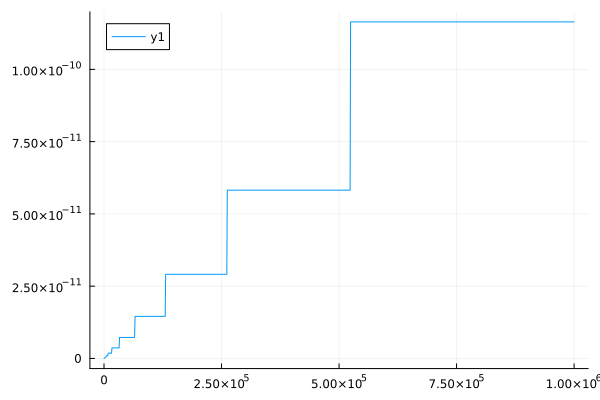

In [13]:
using Plots
x = range(1.0, stop=1000000.0, length=1000)
y = eps.(x)
plot(x,y)

### Zadanie 3

Jedną z bibliotek numerycznych, jaką dodatkowo będziemy używać na zajęciach jest <a href="http://www.gnu.org/software/gsl/gsl.html">GSL</a> (język C). Opis <a href="https://www.gnu.org/software/gsl/doc/html/usage.html"> jak używać </a>. Korzystając ze <a href="https://www.gnu.org/software/gsl/doc/html/ieee754.html"> wsparcia dla wyświetlania reprezentacji liczb zmiennoprzecinkowych</a> zobaczyć jak zmienia się cecha i mantysa dla coraz mniejszych liczb. Zaobserwować, kiedy matysa przestaje być znormalizowana i dlaczego?

Kod załączyć jako komórka Markdown sformatowana jako C ([link](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#code)). Wynik także jako Markdown (kod albo fragment zrzutu ekranu).

#### Kod w języku C

```C
#include <stdio.h>
#include <gsl/gsl_sf_log.h>
int main(void)
{
    double x = 1.0;
    while (x > 0.0)
    {
        unsigned long long bits = *(unsigned long long *)&x;
        unsigned long long mantissa = bits & ((1ull << 52) - 1);
        int exponent = (bits >> 52) & ((1 << 11) - 1);
        exponent -= 1023;
        printf("x: %g\tmantissa: %llu\texponent: %d\n", x, mantissa, exponent);
        x /= 2.0;
    }
    return 0;
}
```

#### Początkowe i końcowe fragmenty pliku wynikowego

```
x: 1	mantissa: 0	exponent: 0
x: 0.5	mantissa: 0	exponent: -1
x: 0.25	mantissa: 0	exponent: -2
x: 0.125	mantissa: 0	exponent: -3
x: 0.0625	mantissa: 0	exponent: -4
x: 0.03125	mantissa: 0	exponent: -5
x: 0.015625	mantissa: 0	exponent: -6
x: 0.0078125	mantissa: 0	exponent: -7
x: 0.00390625	mantissa: 0	exponent: -8
x: 0.00195312	mantissa: 0	exponent: -9
x: 0.000976562	mantissa: 0	exponent: -10
x: 0.000488281	mantissa: 0	exponent: -11
x: 0.000244141	mantissa: 0	exponent: -12
x: 0.00012207	mantissa: 0	exponent: -13
x: 6.10352e-05	mantissa: 0	exponent: -14
x: 3.05176e-05	mantissa: 0	exponent: -15
x: 1.52588e-05	mantissa: 0	exponent: -16
x: 7.62939e-06	mantissa: 0	exponent: -17
x: 3.8147e-06	mantissa: 0	exponent: -18
x: 1.90735e-06	mantissa: 0	exponent: -19

....................

x: 3.82265e-298	mantissa: 0	exponent: -988
x: 1.91132e-298	mantissa: 0	exponent: -989
x: 9.55662e-299	mantissa: 0	exponent: -990
x: 4.77831e-299	mantissa: 0	exponent: -991
x: 2.38915e-299	mantissa: 0	exponent: -992
x: 1.19458e-299	mantissa: 0	exponent: -993
x: 5.97289e-300	mantissa: 0	exponent: -994
x: 2.98644e-300	mantissa: 0	exponent: -995
x: 1.49322e-300	mantissa: 0	exponent: -996
x: 7.46611e-301	mantissa: 0	exponent: -997
x: 3.73305e-301	mantissa: 0	exponent: -998
x: 1.86653e-301	mantissa: 0	exponent: -999
x: 9.33264e-302	mantissa: 0	exponent: -1000
x: 4.66632e-302	mantissa: 0	exponent: -1001
x: 2.33316e-302	mantissa: 0	exponent: -1002
x: 1.16658e-302	mantissa: 0	exponent: -1003
x: 5.8329e-303	mantissa: 0	exponent: -1004
x: 2.91645e-303	mantissa: 0	exponent: -1005
x: 1.45822e-303	mantissa: 0	exponent: -1006
x: 7.29112e-304	mantissa: 0	exponent: -1007
x: 3.64556e-304	mantissa: 0	exponent: -1008
x: 1.82278e-304	mantissa: 0	exponent: -1009
x: 9.1139e-305	mantissa: 0	exponent: -1010
x: 4.55695e-305	mantissa: 0	exponent: -1011
x: 2.27848e-305	mantissa: 0	exponent: -1012
x: 1.13924e-305	mantissa: 0	exponent: -1013
x: 5.69619e-306	mantissa: 0	exponent: -1014
x: 2.84809e-306	mantissa: 0	exponent: -1015
x: 1.42405e-306	mantissa: 0	exponent: -1016
x: 7.12024e-307	mantissa: 0	exponent: -1017
x: 3.56012e-307	mantissa: 0	exponent: -1018
x: 1.78006e-307	mantissa: 0	exponent: -1019
x: 8.9003e-308	mantissa: 0	exponent: -1020
x: 4.45015e-308	mantissa: 0	exponent: -1021
x: 2.22507e-308	mantissa: 0	exponent: -1022
x: 1.11254e-308	mantissa: 2251799813685248	exponent: -1023
x: 5.56268e-309	mantissa: 1125899906842624	exponent: -1023
x: 2.78134e-309	mantissa: 562949953421312	exponent: -1023
x: 1.39067e-309	mantissa: 281474976710656	exponent: -1023
x: 6.95336e-310	mantissa: 140737488355328	exponent: -1023
x: 3.47668e-310	mantissa: 70368744177664	exponent: -1023
x: 1.73834e-310	mantissa: 35184372088832	exponent: -1023
x: 8.69169e-311	mantissa: 17592186044416	exponent: -1023
x: 4.34585e-311	mantissa: 8796093022208	exponent: -1023
x: 2.17292e-311	mantissa: 4398046511104	exponent: -1023
x: 1.08646e-311	mantissa: 2199023255552	exponent: -1023
x: 5.43231e-312	mantissa: 1099511627776	exponent: -1023
x: 2.71615e-312	mantissa: 549755813888	exponent: -1023
x: 1.35808e-312	mantissa: 274877906944	exponent: -1023
x: 6.79039e-313	mantissa: 137438953472	exponent: -1023
x: 3.39519e-313	mantissa: 68719476736	exponent: -1023
x: 1.6976e-313	mantissa: 34359738368	exponent: -1023
x: 8.48798e-314	mantissa: 17179869184	exponent: -1023
x: 4.24399e-314	mantissa: 8589934592	exponent: -1023
x: 2.122e-314	mantissa: 4294967296	exponent: -1023
x: 1.061e-314	mantissa: 2147483648	exponent: -1023
x: 5.30499e-315	mantissa: 1073741824	exponent: -1023
x: 2.65249e-315	mantissa: 536870912	exponent: -1023
x: 1.32625e-315	mantissa: 268435456	exponent: -1023
x: 6.63124e-316	mantissa: 134217728	exponent: -1023
x: 3.31562e-316	mantissa: 67108864	exponent: -1023
x: 1.65781e-316	mantissa: 33554432	exponent: -1023
x: 8.28905e-317	mantissa: 16777216	exponent: -1023
x: 4.14452e-317	mantissa: 8388608	exponent: -1023
x: 2.07226e-317	mantissa: 4194304	exponent: -1023
x: 1.03613e-317	mantissa: 2097152	exponent: -1023
x: 5.18065e-318	mantissa: 1048576	exponent: -1023
x: 2.59033e-318	mantissa: 524288	exponent: -1023
x: 1.29516e-318	mantissa: 262144	exponent: -1023
x: 6.47582e-319	mantissa: 131072	exponent: -1023
x: 3.23791e-319	mantissa: 65536	exponent: -1023
x: 1.61895e-319	mantissa: 32768	exponent: -1023
x: 8.09477e-320	mantissa: 16384	exponent: -1023
x: 4.04739e-320	mantissa: 8192	exponent: -1023
x: 2.02369e-320	mantissa: 4096	exponent: -1023
x: 1.01185e-320	mantissa: 2048	exponent: -1023
x: 5.05923e-321	mantissa: 1024	exponent: -1023
x: 2.52962e-321	mantissa: 512	exponent: -1023
x: 1.26481e-321	mantissa: 256	exponent: -1023
x: 6.32404e-322	mantissa: 128	exponent: -1023
x: 3.16202e-322	mantissa: 64	exponent: -1023
x: 1.58101e-322	mantissa: 32	exponent: -1023
x: 7.90505e-323	mantissa: 16	exponent: -1023
x: 3.95253e-323	mantissa: 8	exponent: -1023
x: 1.97626e-323	mantissa: 4	exponent: -1023
x: 9.88131e-324	mantissa: 2	exponent: -1023
x: 4.94066e-324	mantissa: 1	exponent: -1023

```

#### Wnioski
Liczba typu double ma ograniczoną precyzję 64 bitów, więc nie jest w stanie reprezentować nieskończenie małych wartości. Mantysa jest znormalizowana, gdy pierwszy bit mantysy - jedynka ukryta, jest równy 1, zatem wartości bezwzględne cechy mniejsze niż 1022 oznaczają liczby znormalizowane.
W przykładzie mantysa przestaje być znormalizowana dla x mniejszych od 2^(-1022), czyli kiedy właśnie cecha osiąga wartość -1023, a wtedy jedynka ukryta jest poza zakresem reprezentowanych wartości.

### Zadanie 4

Na przykładzie wybranego algorytmu niestabilnego numerycznie: 
1. Pokazać, że działa źle.
2. Pokazać które konkretnie działania powodują zwiększenie błędu (np. dzielenie przez małą liczbę, cancellation).
3. Zademonstować wersję stabilną.

Nie wolno pokazywać przykładów z wykładu (lub bardzo podobnych)!

Wszystkie punkty przedstawić w postaci notatnika Julii.

### Algorytm znajdowania miejsc zerowych funkcji kwadratowych

#### Algorytm niestabilny numerycznie
Algorytm klasyczny wykorzystuje wzór na pierwiastki równania kwadratowego.

In [14]:
function f_unstable(a, b, c)
    delta = b^2 - 4*a*c
    x1 = (-b + sqrt(delta)) / (2*a)
    x2 = (-b - sqrt(delta)) / (2*a)
    return x1, x2
end

println(f_unstable(1, 10^8, 1));

(-7.450580596923828e-9, -1.0e8)


Algorytm jest niestabilny numerycznie dla niektórych zestawów danych. Przykładem może być funkcja o wartościach a=1, b=10^8, c=1 (f_unstable(1, 10^8, 1)), której dokładne pierwiastki to 1.0e-08 i 1.0e08. 
Wynik funkcji jest jednak nieprecyzyjny co wynika z utraty prezycji przy wykonaniu działania sqrt(delta) - b, w sytuacji gdy wartość bezwzględna z b jest dużo większą liczbą niż a i c, a wtedy sqrt(delta) i b są bliskimi liczbami.
Można to zaprezentować:

In [15]:
a = 1
b = 10^8
c = 1
delta = b^2 - 4*a*c
println("delta: $delta")
println("sqrt(delta) - b: $(sqrt(delta)-b)")

delta: 9999999999999996
sqrt(delta) - b: -1.4901161193847656e-8


Powyższa wartość sqrt(delta) - b jest bliska zeru, jednak jest niedokładna.

#### Algorytm stabilny numerycznie
W tym algorytmie zastosowano zmodyfikowany wzór na pierwiastki równania kwadratowego, który pozwala zminimalizować liczbę działań arytmetycznych i unika utraty prezycji numerycznej, poprzez unikanie odejmowania liczb bliskich sobie i zastosowanie stabilniejszych numerycznie wyrażeń.

In [16]:
function f_stable(a, b, c)
    delta = b^2 - 4*a*c
    if delta >= 0
        q = -0.5*(b+sign(b)*sqrt(delta))
        return c/q, q/a
    else
        return nothing
    end
end

println(f_stable(1, 10^8, 1))

(-1.0e-8, -1.0e8)


Dla tych samych argumentów funkcja używająca algorytmu stabilnego numerycznie zwróciła dokładny i poprawny wynik.